In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [31]:
import pandas as pd

# Load the dataset
file_path = '/content/prostate_analysis_results (2).csv'
data = pd.read_csv(file_path,index_col=0)

In [19]:
data

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa,train
1,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0,-0.430783,T
2,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0,-0.162519,T
3,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20,-0.162519,T
4,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0,-0.162519,T
5,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0,0.371564,T
...,...,...,...,...,...,...,...,...,...,...
93,2.830268,3.876396,68,-1.386294,1,1.321756,7,60,4.385147,T
94,3.821004,3.896909,44,-1.386294,1,2.169054,7,40,4.684443,T
95,2.907447,3.396185,52,-1.386294,1,2.463853,7,10,5.143124,F
96,2.882564,3.773910,68,1.558145,1,1.558145,7,80,5.477509,T


In [20]:
data.describe()

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa
count,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000
mean,1.350010,3.628943,63.865979,0.100356,0.216495,-0.179366,6.752577,24.381443,2.478387
std,1.178625,0.428411,7.445117,1.450807,0.413995,1.398250,0.722134,28.204035,1.154329
min,-1.347074,2.374906,41.000000,-1.386294,0.000000,-1.386294,6.000000,0.000000,-0.430783
25%,0.512824,3.375880,60.000000,-1.386294,0.000000,-1.386294,6.000000,0.000000,1.731656
50%,1.446919,3.623007,65.000000,0.300105,0.000000,-0.798508,7.000000,15.000000,2.591516
75%,2.127041,3.876396,68.000000,1.558145,0.000000,1.178655,7.000000,40.000000,3.056357
max,3.821004,4.780383,79.000000,2.326302,1.000000,2.904165,9.000000,100.000000,5.582932


# part 1

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Assume 'data' is your DataFrame
# Select the relevant columns
scaler = StandardScaler()
data[['age', 'lpsa']] = scaler.fit_transform(data[['age', 'lpsa']])

X = data[['age', 'lpsa']]
y = data['lweight']

# Initialize the StandardScaler and fit it on the features


# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model on the normalized features
model.fit(X, y)

# Coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_

coefficients, intercept


(array([0.12044742, 0.16425249]), 3.628942659793814)

In [40]:
import statsmodels.api as sm

# Add a constant term for the intercept
X = sm.add_constant(data[['age', 'lpsa']])

# Initialize and fit the model
model = sm.OLS(data['lweight'], X).fit()

# Get the summary
summary = model.summary()
print(summary)


                            OLS Regression Results                            
Dep. Variable:                lweight   R-squared:                       0.265
Model:                            OLS   Adj. R-squared:                  0.250
Method:                 Least Squares   F-statistic:                     16.97
Date:                Thu, 01 Feb 2024   Prob (F-statistic):           5.08e-07
Time:                        16:54:28   Log-Likelihood:                -39.956
No. Observations:                  97   AIC:                             85.91
Df Residuals:                      94   BIC:                             93.64
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.6289      0.038     96.314      0.0

# part 2

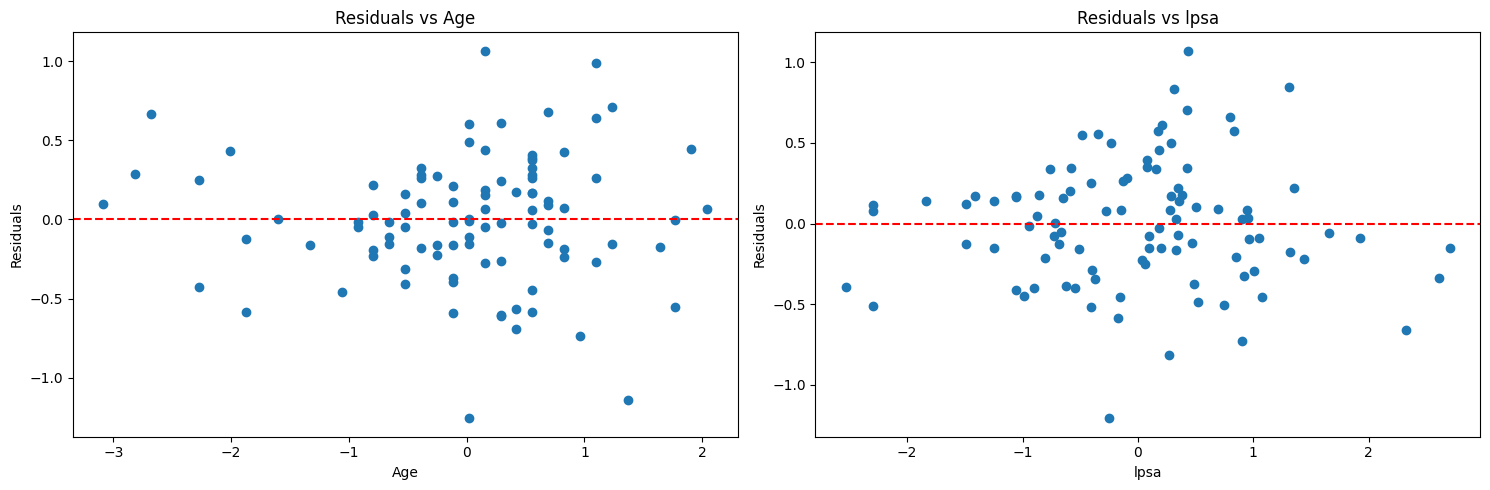

In [34]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Define the explanatory variables and response variable
X_age = sm.add_constant(data['age'])  # Age with constant added for intercept
X_lpsa = sm.add_constant(data['lpsa'])  # lpsa with constant added for intercept
Y = data['lweight']

# Fit the linear regression models
model_age = sm.OLS(Y, X_age).fit()
model_lpsa = sm.OLS(Y, X_lpsa).fit()

# Calculate the residuals
residuals_age = model_age.resid
residuals_lpsa = model_lpsa.resid

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Scatter plot for age
axes[0].scatter(data['age'], residuals_age)
axes[0].axhline(y=0, color='r', linestyle='--')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Residuals')
axes[0].set_title('Residuals vs Age')

# Scatter plot for lpsa
axes[1].scatter(data['lpsa'], residuals_lpsa)
axes[1].axhline(y=0, color='r', linestyle='--')
axes[1].set_xlabel('lpsa')
axes[1].set_ylabel('Residuals')
axes[1].set_title('Residuals vs lpsa')

plt.tight_layout()
plt.show()


In [38]:
import statsmodels.api as sm

# Add a constant term for the intercept
X = sm.add_constant(data[['age']])

# Initialize and fit the model
model = sm.OLS(data['lweight'], X).fit()

# Get the summary
summary = model.summary()
print(summary)


                            OLS Regression Results                            
Dep. Variable:                lweight   R-squared:                       0.121
Model:                            OLS   Adj. R-squared:                  0.112
Method:                 Least Squares   F-statistic:                     13.09
Date:                Thu, 01 Feb 2024   Prob (F-statistic):           0.000479
Time:                        16:51:30   Log-Likelihood:                -48.651
No. Observations:                  97   AIC:                             101.3
Df Residuals:                      95   BIC:                             106.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.6289      0.041     88.523      0.0

In [39]:
import statsmodels.api as sm

# Add a constant term for the intercept
X = sm.add_constant(data[['lpsa']])

# Initialize and fit the model
model = sm.OLS(data['lweight'], X).fit()

# Get the summary
summary = model.summary()
print(summary)


                            OLS Regression Results                            
Dep. Variable:                lweight   R-squared:                       0.188
Model:                            OLS   Adj. R-squared:                  0.179
Method:                 Least Squares   F-statistic:                     21.96
Date:                Thu, 01 Feb 2024   Prob (F-statistic):           9.28e-06
Time:                        16:51:32   Log-Likelihood:                -44.824
No. Observations:                  97   AIC:                             93.65
Df Residuals:                      95   BIC:                             98.80
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.6289      0.039     92.085      0.0

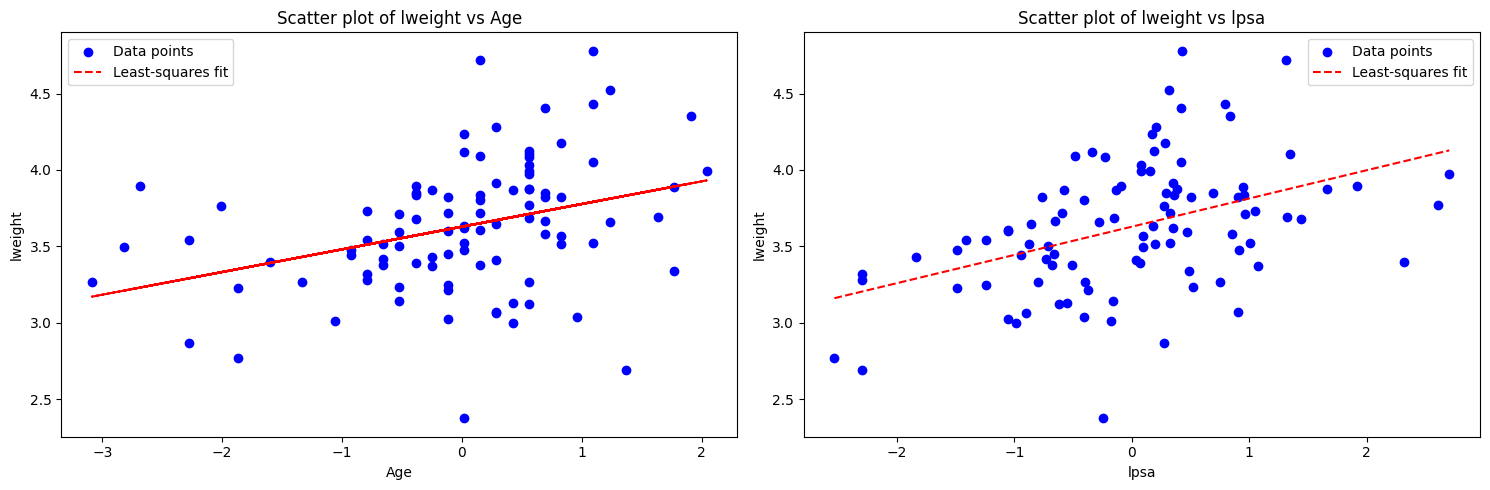

In [41]:
# Plotting the scatter plots with least-squares fit line for each explanatory variable

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Scatter plot and least-squares fit for age
axes[0].scatter(data['age'], Y, color='blue', label='Data points')
axes[0].plot(data['age'], model_age.predict(X_age), color='red', linestyle='--', label='Least-squares fit')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('lweight')
axes[0].set_title('Scatter plot of lweight vs Age')
axes[0].legend()

# Scatter plot and least-squares fit for lpsa
axes[1].scatter(data['lpsa'], Y, color='blue', label='Data points')
axes[1].plot(data['lpsa'], model_lpsa.predict(X_lpsa), color='red', linestyle='--', label='Least-squares fit')
axes[1].set_xlabel('lpsa')
axes[1].set_ylabel('lweight')
axes[1].set_title('Scatter plot of lweight vs lpsa')
axes[1].legend()

plt.tight_layout()
plt.show()




# Part 3

# Part 4

In [66]:
import pandas as pd

import pandas as pd

# Load the dataset

data = pd.read_csv('/content/prostate_analysis_results (2).csv',index_col=0)

# Choose a random sample of 50 data points from the dataset
sample = data.sample(50)



# Display the first few rows of the sample
print(sample.head())


      lcavol   lweight  age      lbph  svi       lcp  gleason  pgg45  \
79  2.648300  3.582129   69 -1.386294    1  2.583998        7     70   
39  2.660959  4.085136   68  1.373716    1  1.832581        7     35   
52  1.660131  4.234831   64  2.073172    0 -1.386294        6      0   
63  2.775709  3.524889   72 -1.386294    0  1.558145        9     95   
17 -0.415515  3.516013   70  1.244155    0 -0.597837        7     30   

        lpsa train  
79  3.457893     T  
39  2.213754     T  
52  2.677591     T  
63  2.853592     T  
17  1.470176     T  


In [74]:
# Select a random sample of 50 data points
sample_data = data.sample(50)

# Selecting the columns of interest
columns_of_interest = ['lweight', 'age', 'lpsa']
sample_data = sample_data[columns_of_interest]

# Normalize the data
scaler = StandardScaler()
sample_data_normalized = pd.DataFrame(scaler.fit_transform(sample_data), columns=columns_of_interest)

# Split the data into training and testing sets (90% train, 10% test)
train_data, test_data = train_test_split(sample_data_normalized, test_size=0.1, random_state=1)

train_data.head()

,lweight,age,lpsa
3,0.138712,0.388855,-0.766344
48,-1.043507,0.644681,-0.529730
29,0.696375,-0.250709,-0.003401
46,0.398503,-1.785663,0.359319
31,1.120400,0.644681,-0.142799


In [75]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

# Prepare data for the first model (age as explanatory variable)
X_train_age = train_data[['age']]
y_train = train_data['lweight']
X_test_age = test_data[['age']]
y_test = test_data['lweight']

# Build the linear regression model
model_age = LinearRegression().fit(X_train_age, y_train)

# Add a constant to the predictor variable set for the statsmodels
X_train_age_with_const = sm.add_constant(X_train_age)

# Fit the model using statsmodels to get the summary for hypothesis testing and confidence intervals
model_age_sm = sm.OLS(y_train, X_train_age_with_const).fit()

# Summary of the model to get p-value and confidence intervals
summary_age = model_age_sm.summary()
print(summary_age)


                            OLS Regression Results                            
Dep. Variable:                lweight   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     2.311
Date:                Thu, 01 Feb 2024   Prob (F-statistic):              0.136
Time:                        19:03:11   Log-Likelihood:                -60.653
No. Observations:                  45   AIC:                             125.3
Df Residuals:                      43   BIC:                             128.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0646      0.142     -0.455      0.6

In [76]:
# Prepare data for the second model (lpsa as explanatory variable)
X_train_lpsa = train_data[['lpsa']]
X_test_lpsa = test_data[['lpsa']]

# Build the linear regression model
model_lpsa = LinearRegression().fit(X_train_lpsa, y_train)

# Add a constant to the predictor variable set for the statsmodels
X_train_lpsa_with_const = sm.add_constant(X_train_lpsa)

# Fit the model using statsmodels to get the summary for hypothesis testing and confidence intervals
model_lpsa_sm = sm.OLS(y_train, X_train_lpsa_with_const).fit()

# Summary of the model to get p-value and confidence intervals
summary_lpsa = model_lpsa_sm.summary()
print(summary_lpsa)

                            OLS Regression Results                            
Dep. Variable:                lweight   R-squared:                       0.287
Model:                            OLS   Adj. R-squared:                  0.270
Method:                 Least Squares   F-statistic:                     17.28
Date:                Thu, 01 Feb 2024   Prob (F-statistic):           0.000151
Time:                        19:03:13   Log-Likelihood:                -54.229
No. Observations:                  45   AIC:                             112.5
Df Residuals:                      43   BIC:                             116.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0138      0.124     -0.112      0.9

In [77]:
from sklearn.metrics import r2_score, mean_squared_error

# Predict using the model with 'age' as the explanatory variable
y_pred_age = model_age.predict(X_test_age)

# Calculate R-squared and Mean Squared Error for the model with 'age'
r2_age = r2_score(y_test, y_pred_age)
mse_age = mean_squared_error(y_test, y_pred_age)

# Predict using the model with 'lpsa' as the explanatory variable
y_pred_lpsa = model_lpsa.predict(X_test_lpsa)

# Calculate R-squared and Mean Squared Error for the model with 'lpsa'
r2_lpsa = r2_score(y_test, y_pred_lpsa)
mse_lpsa = mean_squared_error(y_test, y_pred_lpsa)

(r2_age, mse_age), (r2_lpsa, mse_lpsa)


((0.045930809127966765, 1.3991992631912167),
 (-0.05357791132527012, 1.545134725389728))

In [82]:
# Define a range for successful prediction
range = 0.2

# Calculate success rate for the model with 'age'
success_rate_age = sum(abs(y_test - y_pred_age) <= range) / len(y_test)

# Calculate success rate for the model with 'lpsa'
success_rate_lpsa = sum(abs(y_test - y_pred_lpsa) <= range) / len(y_test)

(success_rate_age, success_rate_lpsa)


(0.0, 0.2)